In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from ansys.mapdl.core import launch_mapdl
from ansys.mapdl import reader as pymapdl_reader
import pyvista

In [2]:
# 기본적으로 plot이 안돼서 html로 plot하도록 만듦
pyvista.set_jupyter_backend('html')
pyvista.start_xvfb()

In [ ]:
# Start an MAPDL instance
try:
    mapdl = launch_mapdl(start_instance=False, port=50052)
except:
    mapdl = launch_mapdl(start_instance=True, port=50052)

In [4]:
mapdl.finish()
mapdl.clear()
mapdl.prep7()

*** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2024 R2          24.2     ***
 Ansys Mechanical Enterprise Academic Research     
 01078600  VERSION=LINUX x64     15:48:54  NOV 24, 2024 CP=      1.330

                                                                               



          ***** MAPDL ANALYSIS DEFINITION (PREP7) *****

## Triangular Lattice Creation

In [5]:
design_width = 60/1000
design_height = 25/1000
total_width = 144/1000
total_z = 5/1000
# density = 0.5

wall_thickness = 1.6/1000
n_cell = 5
external_wall = False
external_wall_thickness = wall_thickness

In [6]:
cell_size = (design_height - 2*5/6*np.sqrt(3)*wall_thickness
              - (n_cell - 1)*np.sqrt(3)*wall_thickness)/n_cell + np.sqrt(3)*wall_thickness

In [7]:
i = 0
design_part = mapdl.rectng(0, design_width, 0, design_height)
while True:
    if i%2 == 0:
        for j in range(n_cell):
            k1 = mapdl.k(x = i*cell_size*np.sqrt(3)/2, y = j*cell_size + 5/6*np.sqrt(3)*wall_thickness)
            k2 = mapdl.k(x = i*cell_size*np.sqrt(3)/2, y = (j+1)*cell_size - 1/6*np.sqrt(3)*wall_thickness)
            k3 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - 3/2*wall_thickness, y = (j+1/2)*cell_size + 1/3*np.sqrt(3)*wall_thickness)
            hole = mapdl.a(k1, k2, k3)
            try:
                design_part = mapdl.asba(na1 = design_part, na2 = hole)
            except:
                pass
            
        for j in range(n_cell-1):
            k1 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - wall_thickness, y = (j+1/2)*cell_size + 5/6*np.sqrt(3)*wall_thickness)
            k2 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - wall_thickness, y = (j+3/2)*cell_size - 1/6*np.sqrt(3)*wall_thickness)
            k3 = mapdl.k(x = i*cell_size*np.sqrt(3)/2 + 1/2*wall_thickness, y = (j+1)*cell_size + 1/3*np.sqrt(3)*wall_thickness)
            hole = mapdl.a(k1, k2, k3)
            try:
                design_part = mapdl.asba(na1 = design_part, na2 = hole)
            except:
                pass
        k1 = mapdl.k(x = i*cell_size*np.sqrt(3)/2 - wall_thickness/2, y = 0)
        k2 = mapdl.k(x = (i+2)*cell_size*np.sqrt(3)/2 - wall_thickness/2, y = 0)
        k3 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - wall_thickness/2, y = 1/2*cell_size)
        hole = mapdl.a(k1, k2, k3)
        try:
            design_part = mapdl.asba(na1 = design_part, na2 = hole)
        except:
            pass
        k1 = mapdl.k(x = i*cell_size*np.sqrt(3)/2 - wall_thickness/2, y = design_height)
        k2 = mapdl.k(x = (i+2)*cell_size*np.sqrt(3)/2 - wall_thickness/2, y = design_height)
        k3 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - wall_thickness/2, y = design_height - 1/2*cell_size)
        hole = mapdl.a(k1, k2, k3)
        try:
            design_part = mapdl.asba(na1 = design_part, na2 = hole)
        except:
            pass
    else:
        for j in range(n_cell):
            k1 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - wall_thickness, y = j*cell_size + 5/6*np.sqrt(3)*wall_thickness)
            k2 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - wall_thickness, y = (j+1)*cell_size - 1/6*np.sqrt(3)*wall_thickness)
            k3 = mapdl.k(x = i*cell_size*np.sqrt(3)/2 + 1/2*wall_thickness, y = (j+1/2)*cell_size + 1/3*np.sqrt(3)*wall_thickness)
            hole = mapdl.a(k1, k2, k3)
            try:
                design_part = mapdl.asba(na1 = design_part, na2 = hole)
            except:
                pass
        for j in range(n_cell-1):
            k1 = mapdl.k(x = i*cell_size*np.sqrt(3)/2, y = (j+1/2)*cell_size + 5/6*np.sqrt(3)*wall_thickness)
            k2 = mapdl.k(x = i*cell_size*np.sqrt(3)/2, y = (j+3/2)*cell_size - 1/6*np.sqrt(3)*wall_thickness)
            k3 = mapdl.k(x = (i+1)*cell_size*np.sqrt(3)/2 - 3/2*wall_thickness, y = (j+1)*cell_size + 1/3*np.sqrt(3)*wall_thickness)
            hole = mapdl.a(k1, k2, k3)
            try:
                design_part = mapdl.asba(na1 = design_part, na2 = hole)
            except:
                pass
    if (i+1)*cell_size*np.sqrt(3)/2 > design_width:
        break
    i+=1

In [8]:
mapdl.rectng(x1=-total_width/2+design_width/2, x2=0, y1=0, y2=design_height)
mapdl.rectng(design_width, total_width/2+design_width/2, 0, design_height)
if external_wall:
    mapdl.rectng(x1=0, x2=design_width, y1=0, y2=external_wall_thickness)
    mapdl.rectng(x1=0, x2=design_width, y1=design_height, y2=design_height-external_wall_thickness)
mapdl.aadd("all")

4

In [9]:
mapdl.vext("ALL", dz = total_z)

EXTRUDE ALL AREAS 
      IN DIRECTION   0.000000    ,  0.000000    , 0.5000000E-02
      SCALED         0.000000    ,  0.000000    ,  0.000000

In [10]:
mapdl.vplot(cpos="xy", show_lines=True)

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [11]:
mapdl.get(entity="VOLU", entnum=1, item1="VOLU")/design_height/total_width/total_z

0.9045217666666667

In [10]:
mapdl.geometry.get_volumes()

PolyData (0x779150946320)
  N Cells:    3452
  N Points:   3115
  N Strips:   0
  X Bounds:   -4.200e-02, 1.020e-01
  Y Bounds:   0.000e+00, 2.500e-02
  Z Bounds:   0.000e+00, 5.000e-03
  N Arrays:   1

## Preprocessing

In [11]:
stress_strain = pd.read_excel('PLA stress-strain.xlsx')
stress_strain = stress_strain.iloc[:8]  # due to limitations of MISO model
stress_strain['y'] = stress_strain['y (MPa)']*1e6
stress_strain['x'] = stress_strain['x']/100
UTS = stress_strain['y'].max()
Youngs_Modulus = stress_strain['y'][1]/stress_strain['x'][1]
max_plastic_strain = stress_strain['x'].iloc[-1]

mapdl.mp('EX', 1, Youngs_Modulus)   # Young's Modulus in Pascals
mapdl.mp('PRXY', 1, 0.33)   # Poisson's Ratio

# Non linear 부분 정의
stress_strain['x'] = stress_strain['x'] - stress_strain['y']/Youngs_Modulus
mapdl.tb('PLASTIC', 1, '', 'MISO')
for i in range(len(stress_strain)):
    mapdl.tbpt(i, stress_strain['x'][i], stress_strain['y'][i])

In [12]:
mapdl.allsel()

SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

In [13]:
# Element type with plasticity capability (SOLID185 is suitable)
mapdl.et(1, 'SOLID187')

# Define mesh size
mapdl.esize(0.001)  # Smaller element size for better accuracy

# Mesh the volume
mapdl.vmesh('ALL')

GENERATE NODES AND ELEMENTS   IN  ALL  SELECTED VOLUMES  

 NUMBER OF VOLUMES MESHED   =         1
 MAXIMUM NODE NUMBER        =    216831
 MAXIMUM ELEMENT NUMBER     =    139620

 ------------------------------------------------------------------------------
            <<<<<<          SHAPE TESTING SUMMARY           >>>>>>
            <<<<<<       FOR NEW OR MODIFIED ELEMENTS       >>>>>>
 ------------------------------------------------------------------------------
                    --------------------------------------
                    |  Element count    139620 SOLID187  |
                    --------------------------------------

  Test                Number tested  Warning count  Error count    Warn+Err %
  ----                -------------  -------------  -----------    ----------
  Aspect Ratio             139620              0             0         0.00 %
  Maximum Angle            139620              2             0         0.00 %
  Jacobian Ratio           139620   

In [23]:
mapdl.esel('S','CENT','X', '-0.01', '0.01')

array([    13,     17,     26, ..., 139594, 139595, 139612], dtype=int32)

In [ ]:
mapdl.eplot()

KeyboardInterrupt: Interrupted during MAPDL execution

: 

In [ ]:
# eplot보다 이게 더 빠름 ㅋㅋ
mapdl.solution()
mapdl.antype('STATIC')
mapdl.autots('OFF')
mapdl.nsubst(1, 1, 1)

mapdl.nsel('S', 'LOC', 'X', (total_width + design_width)/2)
mapdl.d('ALL', 'ALL', 0)
mapdl.nsel('S', 'LOC', 'X', (-total_width + design_width)/2)
mapdl.d("ALL", "ALL", 0)
mapdl.nsel('ALL')

mapdl.solve()
mapdl.post1()

result = mapdl.result
pyvista.set_jupyter_backend('html')
pyvista.start_xvfb()
result.plot_principal_nodal_stress(
    0,
    "SEQV",
    cpos="xy",
    background="w",
    text_color="k",
    add_text=True,
    show_edges=True,
)

## Simulation

In [13]:
mapdl.solution()

***** ROUTINE COMPLETED *****  CP =        16.435



 *****  MAPDL SOLUTION ROUTINE  *****

In [14]:
mapdl.antype('STATIC')
mapdl.nlgeom('ON')  # Enable large deformation effects

total_displacement = 0.03  # 30 mm total displacement
number_of_steps = 100
displacement_increment = total_displacement / number_of_steps

In [15]:
# mapdl.nropt('UNSYM')  # Use unsymmetric matrix if convergence issues occur
mapdl.autots('ON')    # Enable automatic time stepping
# mapdl.nliter(50, 0, 0, 0, 0)  # Set maximum number of equilibrium iterations
# mapdl.cnvtol('F', 0.1)  # Force convergence tolerance
mapdl.nsubst(20, 100, 1)
# mapdl.deltim(dtime = "AUTOTS", dtmin = 0, dtmax = 1)

USE      20 SUBSTEPS INITIALLY THIS LOAD STEP FOR ALL  DEGREES OF FREEDOM
 FOR AUTOMATIC TIME STEPPING:
   USE    100 SUBSTEPS AS A MAXIMUM
   USE      1 SUBSTEPS AS A MINIMUM

In [32]:
import time
# Initialize arrays to store results
reaction_forces = []
applied_displacements = []

for step in range(1, number_of_steps + 1):
    time_start = time.time()
    current_disp = displacement_increment * step
    mapdl.ddele('ALL', 'UX')  # Remove previous displacement BC
    mapdl.nsel('S', 'LOC', 'X', (total_width + design_width)/2)
    mapdl.d('ALL', 'UX', current_disp)
    mapdl.d("ALL", "UY", 0)
    mapdl.d("ALL", "UZ", 0)
    mapdl.nsel('S', 'LOC', 'X', (-total_width + design_width)/2)
    mapdl.d("ALL", "ALL", 0)
    mapdl.nsel('ALL')
    
    time_solutionstart = time.time()
    # Solve current load step
    mapdl.solve()
    time_solutionend = time.time()
    print(f"Solution time = {int(time_solutionend-time_solutionstart):4}s")

    # Post-process to check for failure criterion
    mapdl.post1()
    mapdl.set('LAST')
    
    # Get nodal principal stress
    mapdl.nsel('ALL')
    principal_stress = np.maximum.reduce([mapdl.post_processing.nodal_principal_stress("1"),
                  mapdl.post_processing.nodal_principal_stress("2"),
                  mapdl.post_processing.nodal_principal_stress("3")])


    mapdl.nsel('ALL')
    mapdl.nsel('S', 'LOC', 'X', (-total_width + design_width)/2)

    reaction_forces_selected = mapdl.prrsol('FX').to_dataframe(columns=["NODE", "FX"])
    reaction_force = abs(reaction_forces_selected['FX'].sum())

    # Get the reaction forces from the result object
    # result = mapdl.result
    # # 이거를 result 안쓰고 하는 법 없나? result 문법을 잘 모르겠음
    # nnum, reaction_force = result.nodal_static_forces(0)
    # mapdl.nsel('ALL')
    # mapdl.nsel('S', 'LOC', 'X', 0)
    # selected_nodes = mapdl.mesh.nnum  # Node numbers in the current selection
    # reaction_force = reaction_force[selected_nodes-1].sum(axis=0)[0]
    
    reaction_forces.append(reaction_force)
    applied_displacements.append(current_disp)

    print(f"Step{step:4} completed. Current displacement : {current_disp*1000:6.2f} Elapsed Time : {int(time.time()-time_start):4}s")

    # Principal stress / UTS

    if (principal_stress > UTS).sum() > 0:
        print("Specimen failed")
        break

    mapdl.solution()

Solution time =  215s
Step   1 completed. Current displacement :   0.30 Elapsed Time :  226s
Solution time =  216s
Step   2 completed. Current displacement :   0.60 Elapsed Time :  227s
Solution time =  215s
Step   3 completed. Current displacement :   0.90 Elapsed Time :  226s
Solution time =  216s
Step   4 completed. Current displacement :   1.20 Elapsed Time :  226s
Solution time =  215s
Step   5 completed. Current displacement :   1.50 Elapsed Time :  229s
Solution time =  221s
Step   6 completed. Current displacement :   1.80 Elapsed Time :  232s
Solution time =  221s
Step   7 completed. Current displacement :   2.10 Elapsed Time :  232s
Solution time =  240s
Step   8 completed. Current displacement :   2.40 Elapsed Time :  251s
Specimen failed


## Postprocessing

Text(0, 0.5, 'Reaction Force (N)')

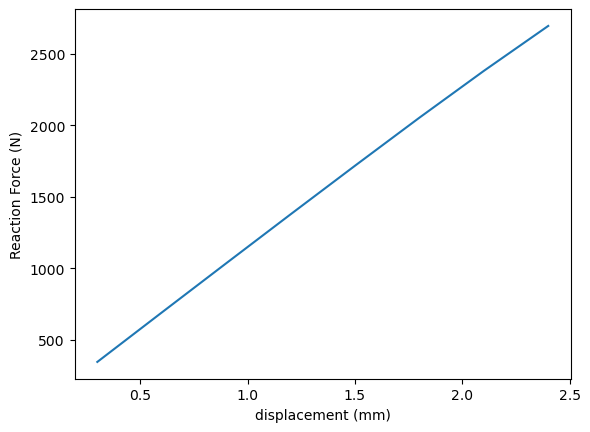

In [46]:
plt.plot(np.array(applied_displacements)*1000, np.array(reaction_forces))
plt.xlabel("displacement (mm)")
plt.ylabel("Reaction Force (N)")

In [34]:
result = mapdl.result

In [6]:
result.plot_principal_nodal_stress(
    0,
    "SEQV",
    cpos="xy",
    background="w",
    text_color="k",
    add_text=True,
    show_edges=True,
)

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [44]:
result.plot_nodal_displacement(
    0,
    cpos="xy",
    displacement_factor=1,
    show_displacement=True,
    show_edges=True,
)

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

## Saving Result

In [3]:
import os

current_dir = os.getcwd()

In [49]:
mapdl.save(fname=f"{current_dir}/result/temp_traingular", ext="db")
# mapdl.run(f"FILE, {current_dir}/result/result_iteration, rst")
mapdl.reswrite(fname = f"{current_dir}/result/temp_traingular")

PUT THIS LOAD CASE ON THE RESULT FILE /home/mjk32/IIAD_pyMAPDL/result/temp_traingular.rst
  AS RESULT SET     1 (LOAD STEP     1 SUBSTEP     7 TIME=  1.0000    )

## Loading Result

In [4]:
mapdl.post1()  # Enter post-processing
mapdl.resume(fname=f"{current_dir}/result/result_iteration", ext="db");

NameError: name 'mapdl' is not defined

In [5]:
result = pymapdl_reader.read_binary(f"{current_dir}/result/temp_traingular.rst")

## Saving 3D object

In [19]:
import os

current_dir = os.getcwd()

In [12]:
import FreeCAD
import Part

# Load the IGES file
input_file = "result/3D_shape1.iges"
output_file = "result/3D_shape1.stl"

doc = FreeCAD.newDocument()
shape = Part.Shape()
shape.read(input_file)

# Add the shape to the document
part = doc.addObject("Part::Feature", "Part")
part.Shape = shape

# Export the model as STL
Part.export([part], output_file)

ImportError: DLL load failed while importing FreeCAD: The specified module could not be found.

In [22]:
mapdl.cdwrite(fname=f"{current_dir}/result/3D_shape2", ext = "txt", exti="stl")

*** MAPDL GLOBAL STATUS *** 

 TITLE =                                                                       
       894 KEYPOINTS DEFINED     MAX KEYPOINT NUMBER =            894
      1341 LINES DEFINED         MAX LINE NUMBER =               1341
       449 AREAS DEFINED         MAX AREA NUMBER =                449
         1 VOLUMES DEFINED       MAX VOLUME NUMBER =                1
         0 ELEM TYPES DEFINED    MAX ELEM TYPE NUMBER =             0
         0 ELEMENTS DEFINED      MAX ELEMENT NUMBER =               0
         0 NODES DEFINED         MAX NODE NUMBER =                  0

 WRITE ANSYS DATABASE AS AN ANSYS INPUT FILE: d:\01__Personal_Projects\IIAD_pyMAPDL/result/3D_shape2.txt                                                                                                                                                                                                          

 WRITE IGES FILE= d:\01__Personal_Projects\IIAD_pyMAPDL/result/3D_shape2.stl

 ATTRIBUTES W

In [ ]:
from create_geometry import triangle_parallel
triangle_parallel(mapdl, n_cell=5, wall_thickness=1.6/1000, external_wall=False)